In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Customer_segmentation_data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.shape

(2000, 8)

In [5]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [6]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [7]:
df.iloc[:,1:].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [8]:
df['Sex'].value_counts()

0    1086
1     914
Name: Sex, dtype: int64

In [9]:
df.groupby('Sex').agg({'Age':['min','max','sum','mean'],'Income':['min','max','mean']})

Age                       Income                       
    min max    sum       mean    min     max           mean
Sex                                                        
0    18  75  41132  37.874770  43684  287247  127775.225599
1    18  76  30686  33.573304  35832  309364  112850.047046

In [10]:
a  = df.iloc[:,1:].describe(percentiles=[0.01,0.03,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,1:]
a

,mean,std,min,1%,3%,5%,50%,95%,97%,98%,99%,max
Sex,0.4570,0.498272,0.0,0.00,0.0,0.0,0.0,1.0,1.00,1.00,1.0,1.0
Marital status,0.4965,0.500113,0.0,0.00,0.0,0.0,0.0,1.0,1.00,1.00,1.0,1.0
Age,35.9090,11.719402,18.0,20.00,21.0,22.0,33.0,61.0,64.00,66.00,68.0,76.0
Education,1.0380,0.599780,0.0,0.00,0.0,0.0,1.0,2.0,2.00,2.00,3.0,3.0
Income,120954.4190,38108.824679,35832.0,51881.09,63969.3,68248.6,115548.5,190871.2,212059.39,222373.16,260848.3,309364.0
Occupation,0.8105,0.638587,0.0,0.00,0.0,0.0,1.0,2.0,2.00,2.00,2.0,2.0
Settlement size,0.7390,0.812533,0.0,0.00,0.0,0.0,1.0,2.0,2.00,2.00,2.0,2.0


In [11]:
lower_end_feat = ['Age','Income']
upper_end_feat = ['Age','Income']

In [12]:
def ol_treatment_upper_end(x):
    x = x.clip(upper = x.quantile(0.99))
    return x

def ol_treatment_lower_end(x):
    x = x.clip(lower = x.quantile(0.01))
    return x

In [13]:
df[lower_end_feat] = df[lower_end_feat].apply(ol_treatment_lower_end)
df[upper_end_feat] = df[upper_end_feat].apply(ol_treatment_upper_end)

In [14]:
s2  = df.iloc[:,1:].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
s2 = s2.iloc[:,1:]
s2

,mean,std,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
Sex,0.4570,0.498272,0.00,0.0000,0.00,0.0,0.0,0.0,1.0,1.00,1.00,1.000,1.0
Marital status,0.4965,0.500113,0.00,0.0000,0.00,0.0,0.0,0.0,1.0,1.00,1.00,1.000,1.0
Age,35.8715,11.583224,20.00,20.0000,21.00,21.0,22.0,33.0,61.0,64.00,66.00,68.000,68.0
Education,1.0380,0.599780,0.00,0.0000,0.00,0.0,0.0,1.0,2.0,2.00,2.00,3.000,3.0
Income,120829.8344,37163.662246,51881.09,51881.9909,61206.08,63969.3,68248.6,115548.5,190871.2,212059.39,222373.16,260847.013,260848.3
Occupation,0.8105,0.638587,0.00,0.0000,0.00,0.0,0.0,1.0,2.0,2.00,2.00,2.000,2.0
Settlement size,0.7390,0.812533,0.00,0.0000,0.00,0.0,0.0,1.0,2.0,2.00,2.00,2.000,2.0


In [15]:
data=df[['Age','Income']]

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [17]:
sc.fit(data)
df_sc = sc.transform(data)

# df_sc = sc.fit_transform(df)
print(df_sc.shape)
print(type(df_sc))

(2000, 2)
<class 'numpy.ndarray'>


In [18]:
df_sc1 = pd.DataFrame(df_sc,columns=['Age','Income'])
df_sc1.head()

,Age,Income
0,2.688050,0.103357
1,-1.197850,0.805912
2,1.133690,-0.851039
3,0.788276,1.365524
4,1.479103,0.759027


In [19]:
df_sc1.describe()

,Age,Income
count,2.000000e+03,2.000000e+03
mean,2.042810e-16,-1.705303e-16
std,1.000250e+00,1.000250e+00
min,-1.370557e+00,-1.855737e+00
25%,-7.660837e-01,-6.235225e-01
50%,-2.479636e-01,-1.421457e-01
75%,5.292165e-01,4.640750e-01
max,2.774403e+00,3.768560e+00


In [20]:
np.round(df_sc1.describe(),1)

,Age,Income
count,2000.0,2000.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.4,-1.9
25%,-0.8,-0.6
50%,-0.2,-0.1
75%,0.5,0.5
max,2.8,3.8


In [21]:
df['Age']=df_sc1['Age']
df['Income']=df_sc1['Income']
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,2.688050,2,0.103357,1,2
1,100000002,1,1,-1.197850,1,0.805912,1,2
2,100000003,0,0,1.133690,1,-0.851039,0,0
3,100000004,0,0,0.788276,1,1.365524,1,1
4,100000005,0,0,1.479103,1,0.759027,1,1


In [22]:
df1=df.copy()

In [23]:
df.drop(['ID'],axis=1,inplace=True)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,2.688050,2,0.103357,1,2
1,1,1,-1.197850,1,0.805912,1,2
2,0,0,1.133690,1,-0.851039,0,0
3,0,0,0.788276,1,1.365524,1,1
4,0,0,1.479103,1,0.759027,1,1


In [24]:
from sklearn.cluster import KMeans

In [25]:
# within cluster sum of square
wcss = []
for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit(df)
    wcss.append(model.inertia_)
    
# model.inertia_ returns the WCSS values
print('WCSS\n',wcss)

WCSS
 [7850.327000000001, 5511.12417378732, 4444.484111268661, 3899.051058732427, 3492.647198736705, 3183.8502655585703, 2953.7454047778683, 2712.450153069356, 2532.5340008614153]


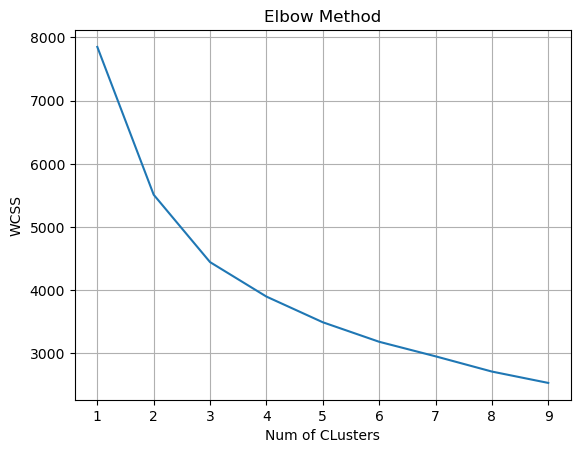

In [26]:
plt.plot(list(range(1,10)),wcss)
plt.title('Elbow Method')
plt.xlabel('Num of CLusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
for i in range(2,10): # i = no of clusters
    m = KMeans(n_clusters=i,random_state=0).fit(df)
    print(f'Silhoutte Score at K={i}',silhouette_score(df,m.labels_))

Silhoutte Score at K=2 0.2917988608740791
Silhoutte Score at K=3 0.25916850427171095
Silhoutte Score at K=4 0.2410962594524865
Silhoutte Score at K=5 0.21573551475224098
Silhoutte Score at K=6 0.22080191991946213
Silhoutte Score at K=7 0.22947103942256697
Silhoutte Score at K=8 0.2371613517473366
Silhoutte Score at K=9 0.24041035941950123


In [29]:
k2 = KMeans(n_clusters=2)
k2.fit(df)

KMeans(n_clusters=2)

In [30]:
ypred_k2 = k2.predict(df)
print(ypred_k2[:10])

[1 1 0 1 1 0 1 1 1 1]


In [31]:
from collections import Counter

In [32]:
c1 = Counter(ypred_k2)
print(c1)

Counter({0: 1293, 1: 707})


In [33]:
cent2 = k2.cluster_centers_
print(cent2.shape)
print(cent2)

(2, 7)
[[ 0.57385924  0.56148492 -0.39976652  0.8863109  -0.50097153  0.55375097
   0.38979118]
 [ 0.24328147  0.37765205  0.73111473  1.31541726  0.91620394  1.28005658
   1.37765205]]


In [34]:
df2 = df.copy()


In [35]:
df2['Cls2'] = ypred_k2
df2.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cls2
0,0,0,2.688050,2,0.103357,1,2,1
1,1,1,-1.197850,1,0.805912,1,2,1
2,0,0,1.133690,1,-0.851039,0,0,0
3,0,0,0.788276,1,1.365524,1,1,1
4,0,0,1.479103,1,0.759027,1,1,1


In [36]:
df2['Cls2'].value_counts()

0    1293
1     707
Name: Cls2, dtype: int64

In [37]:
#cluster profiling
r1 = df2.iloc[:,2:].groupby('Cls2').mean()
r1

,Age,Education,Income,Occupation,Settlement size
Cls2,,,,,
0,-0.399767,0.886311,-0.500972,0.553751,0.389791
1,0.731115,1.315417,0.916204,1.280057,1.377652


In [38]:
r2 = df.iloc[:,2:-1:].mean().reset_index().T
r2.columns = r2.loc['index']
r2 = r2.iloc[1:,:]
r2.index = ['Mean']
r2

index,Age,Education,Income,Occupation
Mean,0.0,1.038,-0.0,0.8105


In [39]:
def K_cluster_analysis(k,table):
    model = KMeans(n_clusters=k,random_state=0)
    model.fit(table)
    ypred = model.predict(table)
    print(Counter(ypred))
    cent = model.cluster_centers_
    table[f'Cls{k}'] = ypred
    r1 = table.drop(f'Cls{k}',axis=1).mean().reset_index().T
    r1.columns = r1.loc['index']
    r1 = r1.iloc[1:,]
    r1.index = ['Mean']
    r2 = table.groupby(f'Cls{k}').mean()
    cls_analysis = pd.concat([r1,r2]).T
    return cls_analysis

In [40]:
df3 = df.copy()
df4 = df.copy()

In [41]:
cls3_report = K_cluster_analysis(3,df3)
cls3_report

Counter({2: 958, 0: 685, 1: 357})


,Mean,0,1,2
Sex,0.457,0.254015,0.358543,0.638831
Marital status,0.4965,0.407299,0.470588,0.569937
Age,0.0,-0.34125,1.657615,-0.373708
Education,1.038,0.808759,1.80112,0.917537
Income,-0.0,0.446586,0.866562,-0.642248
Occupation,0.8105,1.208759,1.078431,0.425887
Settlement size,0.739,1.477372,1.047619,0.096033


In [42]:
cls2_report = K_cluster_analysis(2,df4)
cls2_report

Counter({1: 1292, 0: 708})


,Mean,0,1
Sex,0.457,0.242938,0.574303
Marital status,0.4965,0.371469,0.565015
Age,0.0,0.753272,-0.412784
Education,1.038,1.324859,0.880805
Income,-0.0,0.905905,-0.496425
Occupation,0.8105,1.268362,0.559598
Settlement size,0.739,1.365819,0.395511


In [43]:
from scipy.cluster.hierarchy import linkage, dendrogram

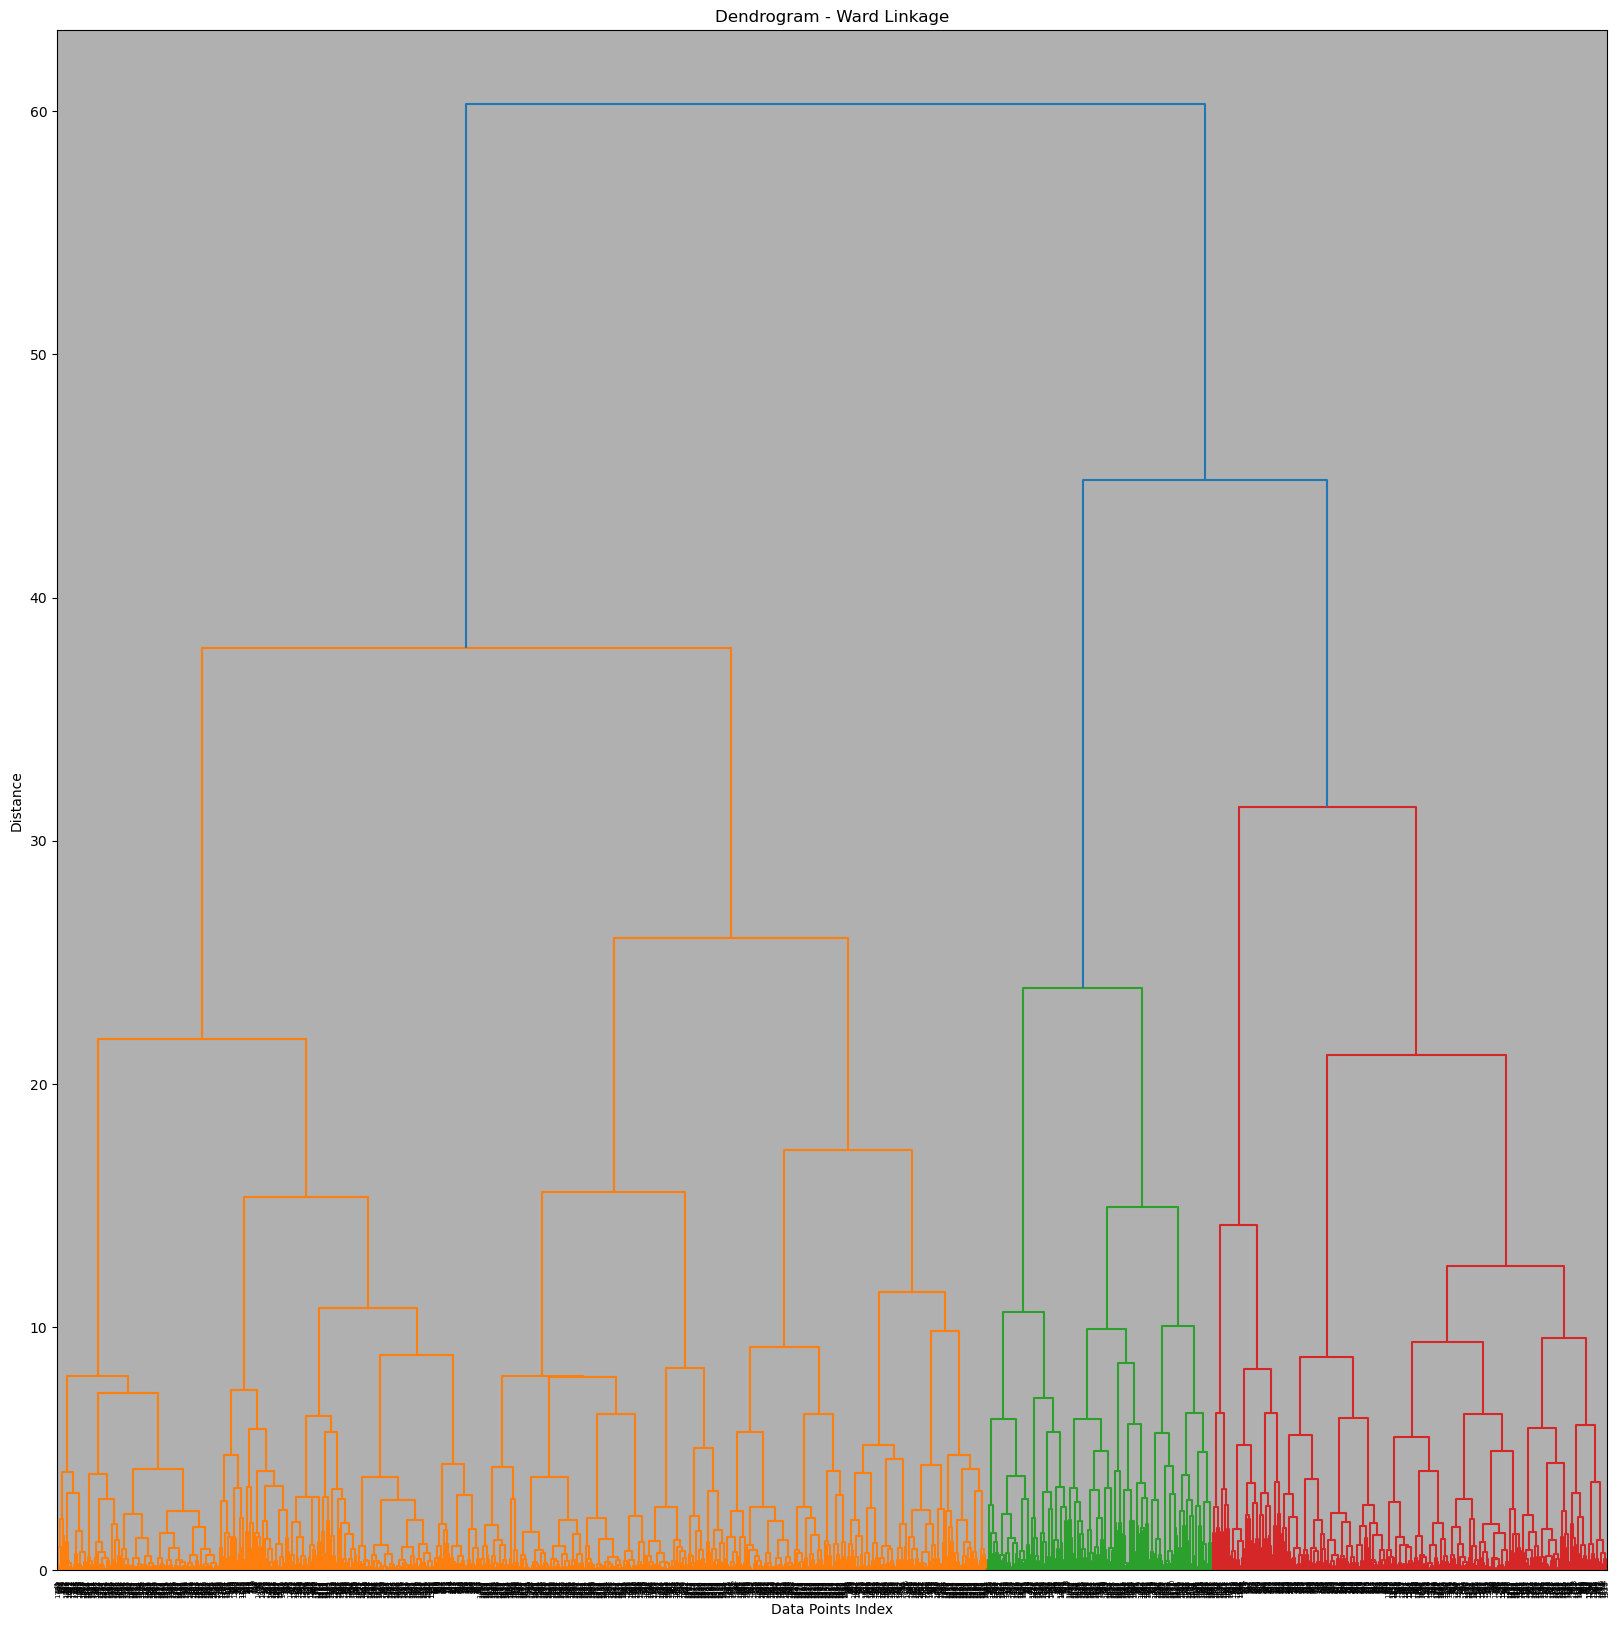

In [44]:
plt.figure(figsize=(20,20))
dendrogram(linkage(df,method='ward'))
#plt.axhline(y=145)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Data Points Index')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [49]:
from sklearn.cluster import AgglomerativeClustering
agg_cls = AgglomerativeClustering(n_clusters=2)  # linkage = ward
ypred2 = agg_cls.fit_predict(df)

In [50]:
print(Counter(ypred2))

Counter({1: 1200, 0: 800})


In [51]:
df5=df.copy()
df5['Cls2'] = ypred2

In [52]:
def AggCls_Profiling(k,table):
    model = AgglomerativeClustering(n_clusters=k)
    ypred = model.fit_predict(table)
    print(Counter(ypred))
    table[f'Cls{k}'] = ypred
    r1 = table.drop(f'Cls{k}',axis=1).mean().reset_index().T
    r1.columns = r1.loc['index']
    r1 = r1.iloc[1:,]
    r1.index = ['Mean']
    r2 = table.groupby(f'Cls{k}').mean()
    cls_analysis = pd.concat([r1,r2]).T
    return cls_analysis

In [53]:
cls2_profile = AggCls_Profiling(2,df5)
cls2_profile

Counter({1: 1200, 0: 800})


,Mean,0,1
Sex,0.457,0.2275,0.61
Marital status,0.4965,0.2975,0.629167
Age,0.0,0.672239,-0.448159
Education,1.038,1.2475,0.898333
Income,-0.0,0.630417,-0.420278
Occupation,0.8105,1.10625,0.613333
Settlement size,0.739,1.27875,0.379167


In [55]:
df6=df.copy()
cls3_profile = AggCls_Profiling(3,df6)
cls3_profile

Counter({0: 1200, 1: 509, 2: 291})


,Mean,0,1,2
Sex,0.457,0.61,0.035363,0.563574
Marital status,0.4965,0.629167,0.047151,0.735395
Age,0.0,-0.448159,0.145292,1.593944
Education,1.038,0.898333,0.748527,2.120275
Income,-0.0,-0.420278,0.737478,0.443152
Occupation,0.8105,0.613333,1.253438,0.848797
Settlement size,0.739,0.379167,1.522593,0.852234
